In [37]:
import pandas as pd

In [38]:
df=pd.read_csv('D:\\Tek-Works\\ensemble  methods\\archive (2)\\train_u6lujuX_CVtuZ9i.csv')

In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
df.drop(columns=['Loan_ID'],inplace=True)

In [42]:
cat_cols=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]

In [43]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)
    

C:\Users\AMULYA GAJE\AppData\Local\Temp\ipykernel_10352\1934140607.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [44]:
numer_Cols=["LoanAmount","Loan_Amount_Term","Credit_History"]
for col in numer_Cols:
    df[col].fillna(df[col].median(),inplace=True)


C:\Users\AMULYA GAJE\AppData\Local\Temp\ipykernel_10352\1400779441.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)


In [45]:
df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N": 0})

In [46]:
df = pd.get_dummies(
    df,
    columns=cat_cols,
    drop_first=True
)

In [47]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier


In [51]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Display Base Model Results
print("Base Model Accuracies:")
print(f"Logistic Regression : {lr_acc:.4f}")
print(f"Decision Tree       : {dt_acc:.4f}")
print(f"KNN                 : {knn_acc:.4f}")
print(f"Random Forest       : {rf_acc:.4f}")


Base Model Accuracies:
Logistic Regression : 0.7886
Decision Tree       : 0.7886
KNN                 : 0.7642
Random Forest       : 0.7886


In [52]:
base_models=[
    ('lr',LogisticRegression(max_iter=1000,random_state=42)),
    ('dt',DecisionTreeClassifier(max_depth=3)),
    ('knn',KNeighborsClassifier(n_neighbors=5)),
    ('rt',RandomForestClassifier(n_estimators=100)),
    ('svm',SVC(probability=True,random_state=42))
]

In [53]:
meta_model=LogisticRegression(max_iter=1000)

In [54]:
classifier=StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=8#validate 5 times
)
classifier.fit(X_train,y_train)

StackingClassifier(cv=8,
                   estimators=[('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('dt', DecisionTreeClassifier(max_depth=3)),
                               ('knn', KNeighborsClassifier()),
                               ('rt', RandomForestClassifier()),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [55]:
y_pred=classifier.predict(X_test)

In [56]:
print("Accuracy score",accuracy_score(y_test,y_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))

Accuracy score 0.7886178861788617
Confusion Matrix
 [[18 25]
 [ 1 79]]


Model Accuracy Comparison
Best Base Model (Random Forest): 0.7886


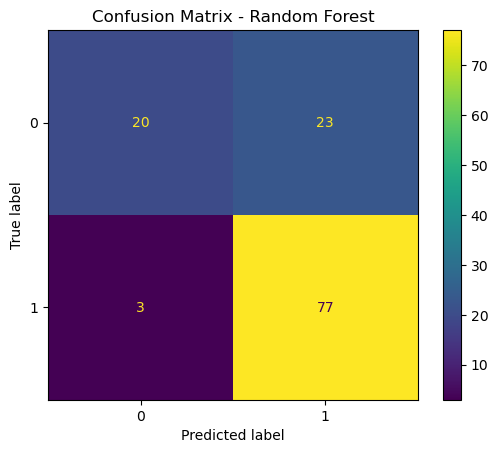

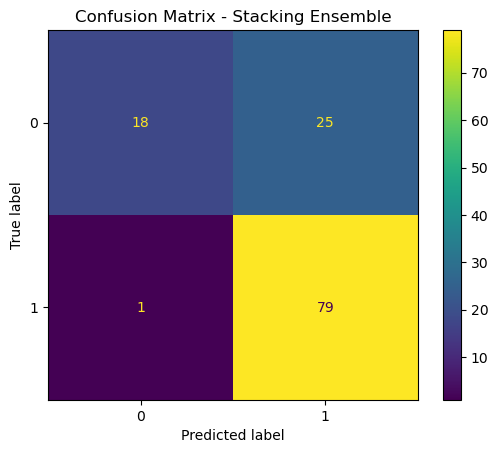

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ================================
# 1. Accuracy Comparison
# ================================

print("Model Accuracy Comparison")
print(f"Best Base Model (Random Forest): {rf_acc:.4f}")


# ================================
# 2. Confusion Matrix - Random Forest
# ================================

rf_cm = confusion_matrix(y_test, rf_pred)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
disp_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ================================
# 3. Confusion Matrix - Stacking Model
# ================================

stack_cm = confusion_matrix(y_test, y_pred)

disp_stack = ConfusionMatrixDisplay(confusion_matrix=stack_cm)
disp_stack.plot()
plt.title("Confusion Matrix - Stacking Ensemble")
plt.show()
